In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Let's get familier with our data's columns before proceeding further.

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to the year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting fraud or genunine of insurance claim.

In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


Here we can see last 5 rows of our dataset which shows the same thing as top 5 as it's a clasification model.

In [6]:
df.shape

(1000, 40)

By the above function we can see that we are having 1000 rows and 40 columns  in our dataset.

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Here we can see that we have different types of data in our data set, that is int, object and float we'll see further if column having object is important for us and if it is important we'll change it into numeric type to fit them in our model.

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see we are having no null values in any column except _c39 which is having all the values as null, so let's drop this column as this will not help us in analysis.

In [3]:
df.drop("_c39",inplace=True, axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

By the above we can analys that we are not having any null value in our dataset now however we are having columns with object datatype which needs to be treated accordingly.

<Axes: >

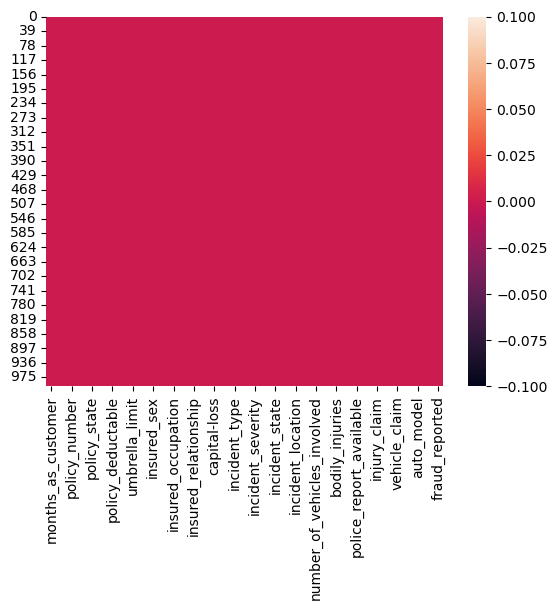

In [12]:
#Let's make a heatmap to analys null values of dataset after treting them.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers and skweness.

In [13]:
df.nunique().to_frame("Unique values")

,Unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [15]:
df.duplicated().sum() 

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we o not have to lose our data.

In [16]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above data.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can see that there is not too much difference in mean and median of most of the column this means our data is not skewed skewed 

By analysing the data we can see that there is difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will treat it further.

Let's check correlation between different columns.

In [17]:
    df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


By the above fubnction we can analys that our data is not corelated too much with each other which means we do not have to face multicollenearity issue, it is just age and month as a customer column which is highly correlated, so let's drop age column here.

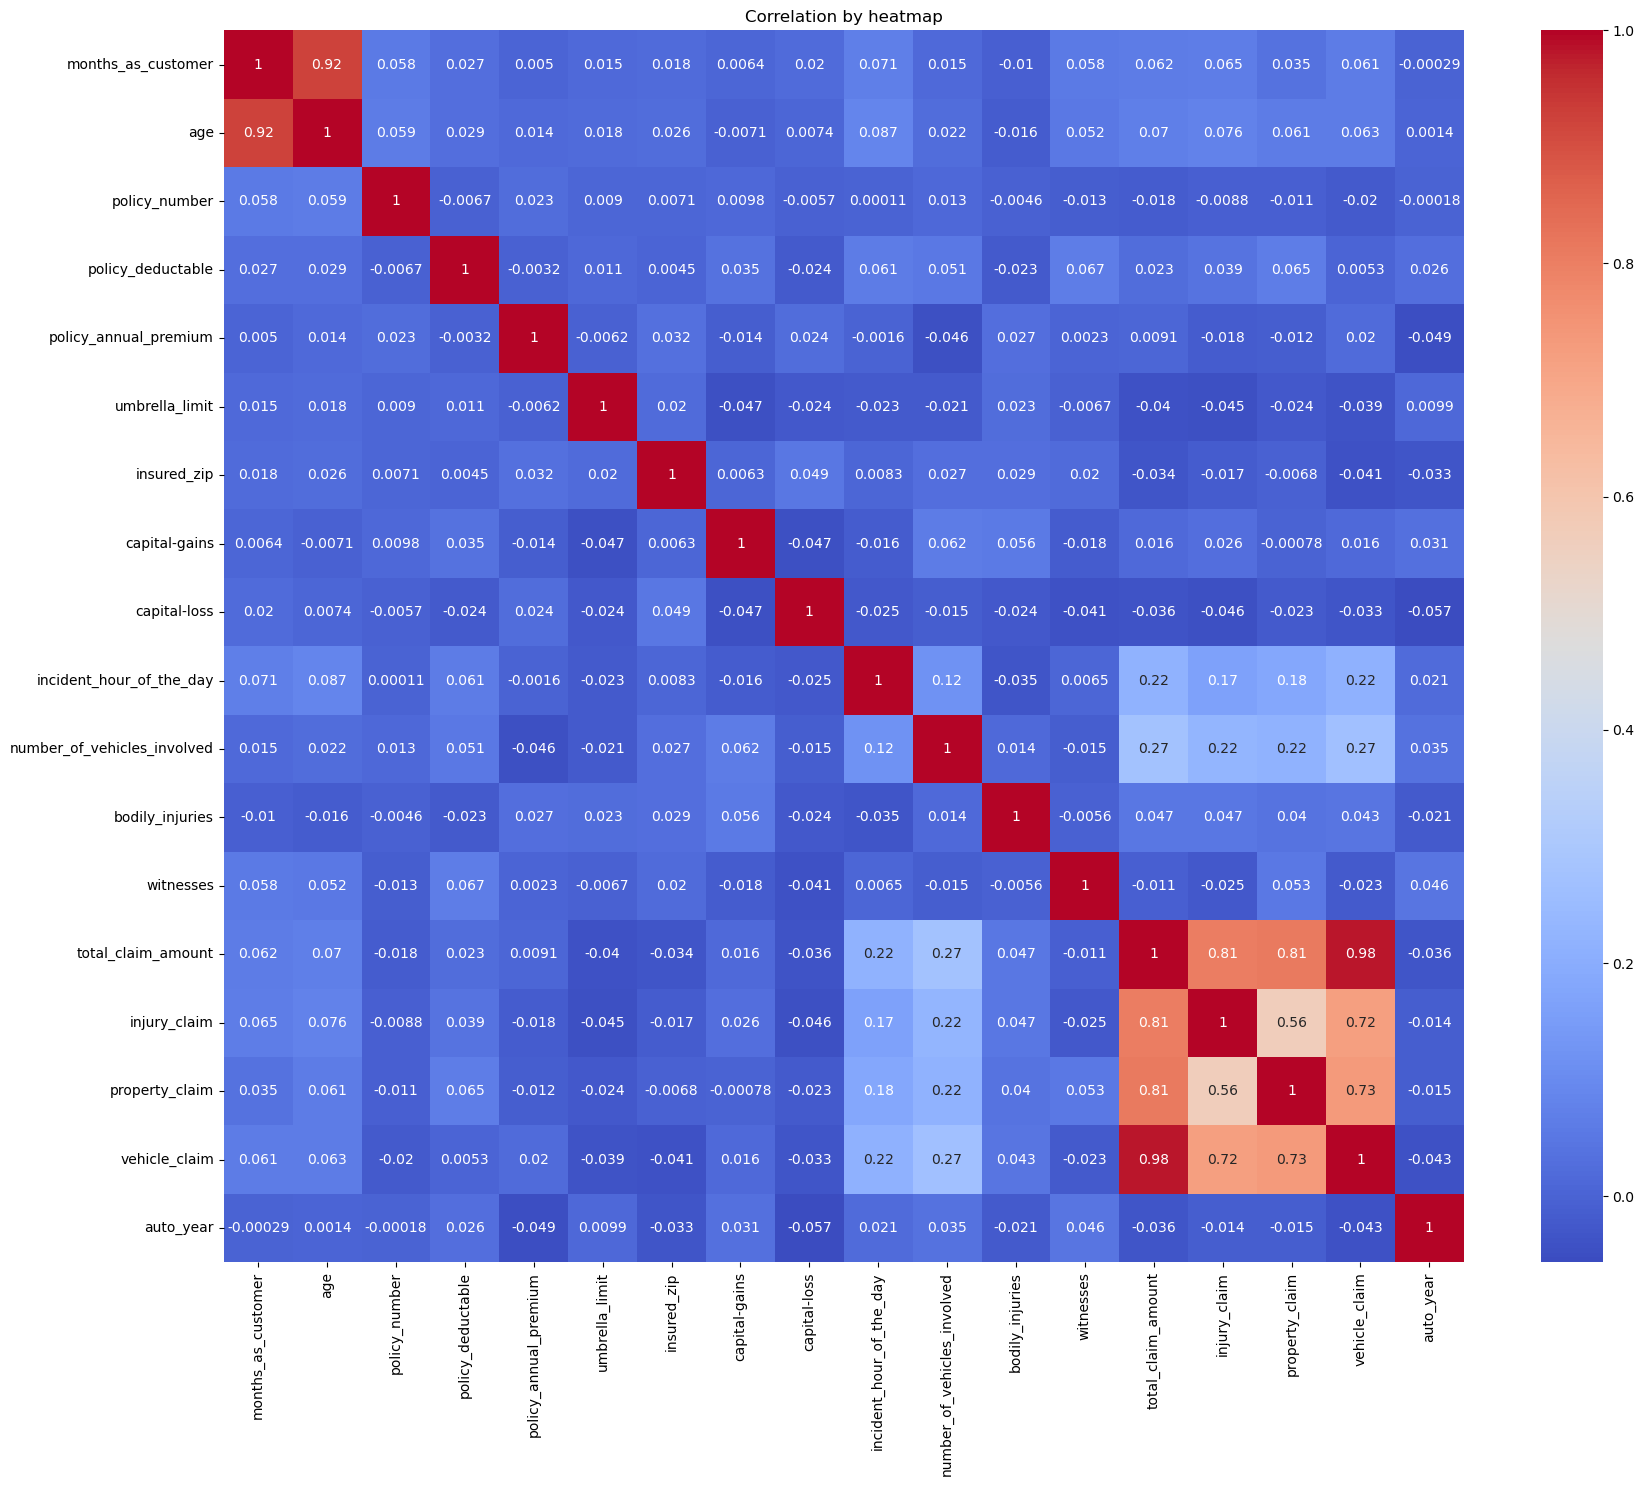

In [19]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

In [4]:
df.drop("age",inplace=True, axis=1)

we can see most of the boxes in blue box that means the data us not having multicollenearity issue.

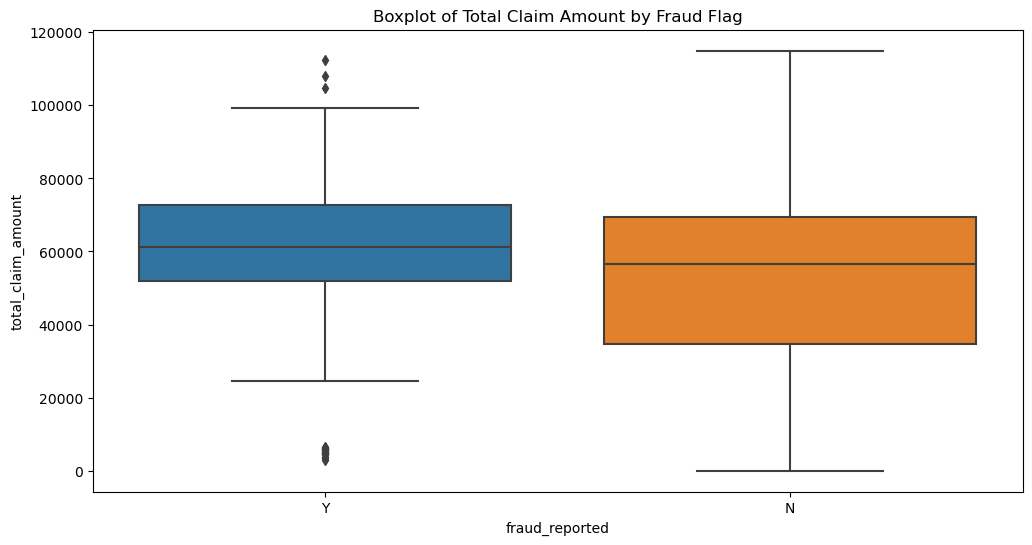

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Boxplot of Total Claim Amount by Fraud Flag')
plt.show()

With the help of above boxplot we can understand that the higher the claim amount is chances of fraud is getting increased.

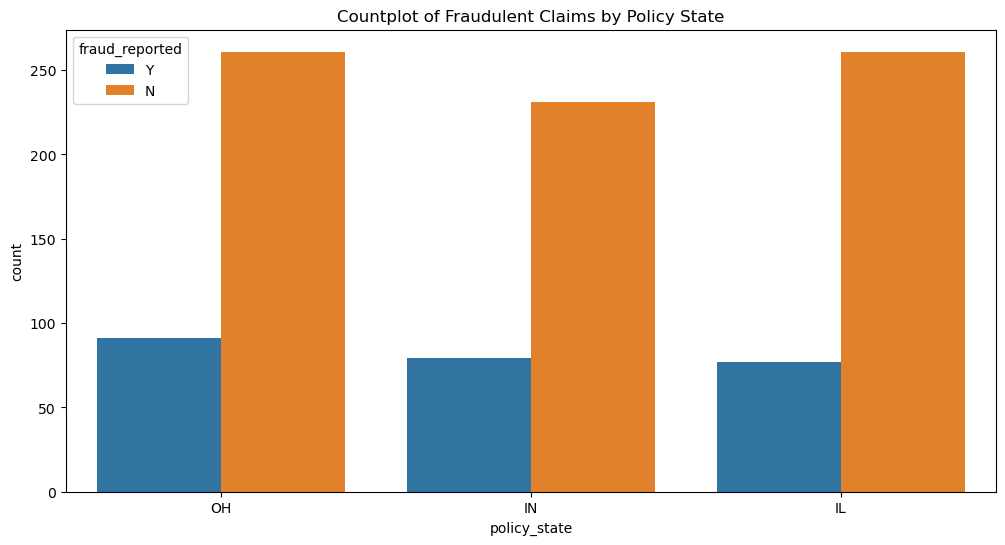

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='policy_state', hue='fraud_reported', data=df)
plt.title('Countplot of Fraudulent Claims by Policy State')
plt.show()

We can see that OH is having more cases of fraud than In and IL

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'months_as_customer'),
  Text(2, 0, 'policy_number'),
  Text(3, 0, 'policy_deductable'),
  Text(4, 0, 'policy_annual_premium'),
  Text(5, 0, 'umbrella_limit'),
  Text(6, 0, 'insured_zip'),
  Text(7, 0, 'capital-gains'),
  Text(8, 0, 'capital-loss'),
  Text(9, 0, 'incident_hour_of_the_day'),
  Text(10, 0, 'number_of_vehicles_involved'),
  Text(11, 0, 'bodily_injuries'),
  Text(12, 0, 'witnesses'),
  Text(13, 0, 'total_claim_amount'),
  Text(14, 0, 'injury_claim'),
  Text(15, 0, 'property_claim'),
  Text(16, 0, 'vehicle_claim'),
  Text(17, 0, 'auto_year')])

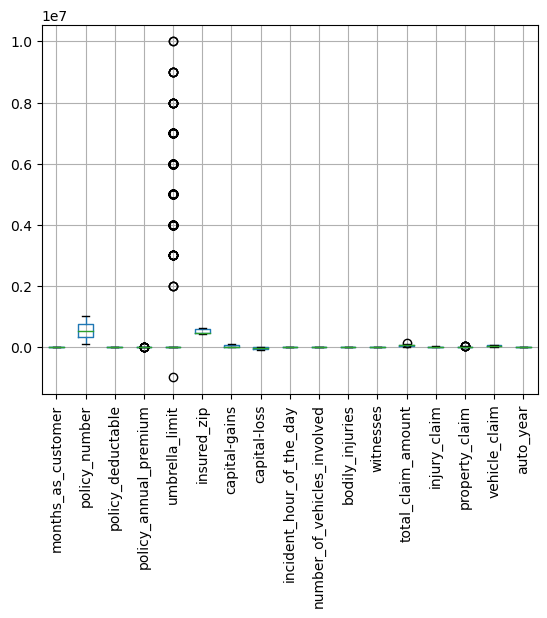

In [9]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above boxplot we can see that we are having outliers in capital-gains, insured_zip, total_claim_amount, injury_claim, property_claim, and vehicle_claim which we'll treat further.

In [10]:
df.drop(columns=['policy_number'],inplace=True)

Let's drop policy_number column as it is not contributing in prediction of data in any ways

In [11]:
#Let's find outlier with Zscore method
outliers=df[['capital-gains', 'insured_zip', 'total_claim_amount', 'injury_claim','property_claim', 'vehicle_claim']]
z=np.abs(zscore(outliers))
z

,capital-gains,insured_zip,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.011331,0.489529,0.714257,0.189283,1.165505,0.749653
1,0.901927,0.461008,1.807312,1.363822,1.372696,1.823346
2,0.358023,0.984885,0.686362,0.054644,0.736072,0.785565
3,0.853388,1.491682,0.403135,0.224130,0.219722,0.677607
4,1.467210,1.527808,1.753121,1.257232,1.399654,1.768252
...,...,...,...,...,...,...
995,0.901927,0.975717,1.305049,2.051155,0.273817,1.224309
996,1.643100,1.492519,2.111466,2.182342,2.214794,1.821868
997,0.358023,0.815138,0.558507,0.013648,0.020826,0.771902
998,0.901927,0.830250,0.219110,0.453708,0.451976,0.073580


In [12]:
np.where(z>3)

(array([500], dtype=int64), array([4], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [13]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now after checking skewness.

In [14]:
df1.shape

(999, 37)

we can see earlier we were having 1000 rows however after rwemoving outliers we are having 999 rows that means we have successfuly removed outliers without too much dataloss.

In [15]:
df1.skew()

months_as_customer             0.363903
policy_deductable              0.476426
policy_annual_premium          0.003948
umbrella_limit                 1.805104
insured_zip                    0.820020
capital-gains                  0.481294
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034240
number_of_vehicles_involved    0.501009
bodily_injuries                0.016637
witnesses                      0.021243
total_claim_amount            -0.594045
injury_claim                   0.264963
property_claim                 0.355621
vehicle_claim                 -0.619587
auto_year                     -0.049282
dtype: float64

That's great we can see we do not have skewness in our data it is just umbrella_limit having skweness, let's treat it to make it perfect.

In [16]:
df1['umbrella_limit']=np.cbrt(df1['umbrella_limit'])

In [17]:
df1.skew()

months_as_customer             0.363903
policy_deductable              0.476426
policy_annual_premium          0.003948
umbrella_limit                 1.521814
insured_zip                    0.820020
capital-gains                  0.481294
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034240
number_of_vehicles_involved    0.501009
bodily_injuries                0.016637
witnesses                      0.021243
total_claim_amount            -0.594045
injury_claim                   0.264963
property_claim                 0.355621
vehicle_claim                 -0.619587
auto_year                     -0.049282
dtype: float64

We can see skewness is till there let's try squareroot method once.

In [19]:
df1['umbrella_limit']=np.sqrt(df1['umbrella_limit'])

In [20]:
df1.skew()

months_as_customer             0.363903
policy_deductable              0.476426
policy_annual_premium          0.003948
umbrella_limit                 1.501617
insured_zip                    0.820020
capital-gains                  0.481294
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034240
number_of_vehicles_involved    0.501009
bodily_injuries                0.016637
witnesses                      0.021243
total_claim_amount            -0.594045
injury_claim                   0.264963
property_claim                 0.355621
vehicle_claim                 -0.619587
auto_year                     -0.049282
dtype: float64

We can see skewness is still present let's drop this column

In [21]:
#Now let's convert important catagorical columns into numeric to make them use in machine learning model.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  

In [24]:
df1['policy_bind_date'] = label_encoder.fit_transform(df1['policy_bind_date'])
df1['policy_state'] = label_encoder.fit_transform(df1['policy_state'])
df1['policy_csl'] = label_encoder.fit_transform(df1['policy_csl'])
df1['insured_sex'] = label_encoder.fit_transform(df1['insured_sex'])
df1['auto_make'] = label_encoder.fit_transform(df1['auto_make'])
df1['auto_model'] = label_encoder.fit_transform(df1['auto_model'])
df1['police_report_available'] = label_encoder.fit_transform(df1['police_report_available'])
df1['property_damage'] = label_encoder.fit_transform(df1['property_damage'])
df1['collision_type'] = label_encoder.fit_transform(df1['collision_type'])
df1['incident_type'] = label_encoder.fit_transform(df1['incident_type'])
df1['insured_relationship'] = label_encoder.fit_transform(df1['insured_relationship'])
df1['insured_hobbies'] = label_encoder.fit_transform(df1['insured_hobbies'])
df1['insured_occupation'] = label_encoder.fit_transform(df1['insured_occupation'])
df1['insured_education_level'] = label_encoder.fit_transform(df1['insured_education_level'])
df1['incident_severity'] = label_encoder.fit_transform(df1['incident_severity'])
df1['authorities_contacted'] = label_encoder.fit_transform(df1['authorities_contacted'])
df1['incident_state'] = label_encoder.fit_transform(df1['incident_state'])
df1['incident_city'] = label_encoder.fit_transform(df1['incident_city'])
df1['incident_location'] = label_encoder.fit_transform(df1['incident_location'])

In [25]:
df1.dtypes

months_as_customer               int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                 float64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [27]:
df1['incident_date'] = pd.to_datetime(df1['incident_date'], format='%d-%m-%Y')

In [31]:
df1['fraud_reported'] = df1['fraud_reported'].map({'Y': 1, 'N': 0})

And it's done we have sorted all the columns and changed them to make in use with our machine learning model, let's proceed further.

In [46]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['months_as_customer', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year']
target = 'fraud_reported'

In [47]:
x = df1[features]
y = df1[target]

In [42]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (999, 35)
dimension of dependent variable: (999,)


We can see that we are having same number of rows that is 999 and 35 columns in indpendent variable wich means we are going good and can perform tarining and prediction.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu= 0
mxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS = i
print("Max accuracy is :" , maxAccu, "at random_state:", maxRS)

Max accuracy is : 0.8166666666666667 at random_state: 14


we can see that the Maximum accuracy is 81 at random state 14

In [49]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.77
[[212  16]
 [ 53  19]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       228
           1       0.54      0.26      0.36        72

    accuracy                           0.77       300
   macro avg       0.67      0.60      0.61       300
weighted avg       0.74      0.77      0.74       300



In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.7666666666666667
[[219   9]
 [ 61  11]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       228
           1       0.55      0.15      0.24        72

    accuracy                           0.77       300
   macro avg       0.67      0.56      0.55       300
weighted avg       0.73      0.77      0.71       300



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.82
[[199  29]
 [ 25  47]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       228
           1       0.62      0.65      0.64        72

    accuracy                           0.82       300
   macro avg       0.75      0.76      0.76       300
weighted avg       0.82      0.82      0.82       300



In [53]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.7766666666666666
[[206  22]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       228
           1       0.55      0.38      0.45        72

    accuracy                           0.78       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.76      0.78      0.76       300



In [54]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8266666666666667
[[209  19]
 [ 33  39]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       228
           1       0.67      0.54      0.60        72

    accuracy                           0.83       300
   macro avg       0.77      0.73      0.74       300
weighted avg       0.82      0.83      0.82       300



As we have done with all the models let's verify accuracy with cross validation method.

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.805     0.77      0.74      0.78      0.7839196]
0.7757839195979901
Difference between Accuracy score and cross validation score is : -76.80839195979901


In [57]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.76       0.74       0.745      0.765      0.75879397]
0.7537587939698492
Difference between Accuracy score and cross validation score is : -74.60921273031826


In [58]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[0.845      0.815      0.815      0.855      0.85427136]
0.8368542713567839
Difference between Accuracy score and cross validation score is : -82.8654271356784


In [59]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.81       0.755      0.745      0.81       0.82914573]
0.7898291457286433
Difference between Accuracy score and cross validation score is : -78.20624790619766


In [60]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.825      0.81       0.785      0.845      0.84924623]
0.8228492462311557
Difference between Accuracy score and cross validation score is : -81.4582579564489


We can see that Gradient boosting classifier is our best model as it is having least difference between actual and cross validation's accuracy

Let's do Hyper parameter tunning by Randomizedsearch

In [61]:
from sklearn.model_selection import  RandomizedSearchCV

In [62]:
parameters={'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]}

In [63]:
RSCV=RandomizedSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [65]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]})

In [67]:
RSCV.best_params_

{'subsample': 0.8,
 'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'learning_rate': 0.1}

In [69]:
Model=GradientBoostingClassifier(subsample= 0.8,n_estimators= 50,min_samples_split= 2,min_samples_leaf= 1, max_depth= 4, learning_rate= 0.1)

In [71]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.81
[[198  30]
 [ 27  45]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       228
           1       0.60      0.62      0.61        72

    accuracy                           0.81       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.81      0.81      0.81       300



We can see that at the final stage ur model is giving accuracy score of 81 which can be considered as good accuracy score.

Now let's save our model by pickle method

In [72]:
import pickle
filename='Insurance_claim_fraud.pkl'
pickle.dump(Model,open(filename,'wb')) Insurance_claim_fraud

In [74]:
Load_model=pickle.load(open('Insurance_claim_fraud.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

81.0


In [75]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [76]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Predicted,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Original,0,1,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0


# Thank you